<a href="https://colab.research.google.com/github/yebinGold/bigdata-final-project/blob/main/%5B%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0%5D_%EC%B6%94%EA%B0%80_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 빅데이터 프로젝트 분석 데이터 중 추가 전처리를 위한 파일

In [2]:
# 드라이브 연동(mount)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 불러오기
import os
os.chdir('/content/drive/MyDrive/Bigdata')

In [4]:
import pandas as pd

### 행정동 코드 매핑을 위한 텍스트 데이터
- 서울시 행정동 코드 정보만 csv 파일로 저장

In [ ]:
data = pd.read_csv('ACMM_ADMSECT.txt', delimiter='|', encoding='cp949')
data

,ADM_SECT_GBN,ADM_CD,ADM_SECT_NM,LOWEST_ADM_SECT_NM,DEL_YMD,CHG_BEF_ADM_SECT_GBN,CRE_YMD,CHG_BEF_ADM_SECT_CD,COL_ADM_SECT_CD
0,A,1100000000,서울특별시,서울특별시,NaN,NaN,19880423,NaN,26110
1,A,1111000000,서울특별시 종로구,종로구,NaN,NaN,19880423,NaN,26110
2,A,1111051500,서울특별시 종로구 청운효자동,청운효자동,NaN,NaN,20081101,NaN,26110
3,A,1111053000,서울특별시 종로구 사직동,사직동,NaN,NaN,19880423,NaN,26110
4,A,1111054000,서울특별시 종로구 삼청동,삼청동,NaN,NaN,19880423,NaN,26110
...,...,...,...,...,...,...,...,...,...
937,L,1174010600,서울특별시 강동구 둔촌동,둔촌동,NaN,L,19880423,11140458.0,26110
938,L,1174010700,서울특별시 강동구 암사동,암사동,NaN,L,19880423,11140459.0,26110
939,L,1174010800,서울특별시 강동구 성내동,성내동,NaN,L,19880423,11140460.0,26110
940,L,1174010900,서울특별시 강동구 천호동,천호동,NaN,L,19880423,11140462.0,26110


In [ ]:
data = data[['ADM_CD', 'LOWEST_ADM_SECT_NM']]
data

,ADM_CD,LOWEST_ADM_SECT_NM
0,1100000000,서울특별시
1,1111000000,종로구
2,1111051500,청운효자동
3,1111053000,사직동
4,1111054000,삼청동
...,...,...
937,1174010600,둔촌동
938,1174010700,암사동
939,1174010800,성내동
940,1174010900,천호동


In [ ]:
data['ADM_CD'] = data['ADM_CD'] // 100
data

<ipython-input-7-5deea9c5f0ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ADM_CD'] = data['ADM_CD'] // 100


,ADM_CD,LOWEST_ADM_SECT_NM
0,11000000,서울특별시
1,11110000,종로구
2,11110515,청운효자동
3,11110530,사직동
4,11110540,삼청동
...,...,...
937,11740106,둔촌동
938,11740107,암사동
939,11740108,성내동
940,11740109,천호동


In [ ]:
data = data.rename(columns={'ADM_CD':'행정동코드'})
data = data.rename(columns={'LOWEST_ADM_SECT_NM':'행정동_명칭'})
data

,행정동코드,행정동_명칭
0,11000000,서울특별시
1,11110000,종로구
2,11110515,청운효자동
3,11110530,사직동
4,11110540,삼청동
...,...,...
937,11740106,둔촌동
938,11740107,암사동
939,11740108,성내동
940,11740109,천호동


In [ ]:
# 0번째 행 삭제
data = data.drop(0)
data

,행정동코드,행정동_명칭
1,11110000,종로구
2,11110515,청운효자동
3,11110530,사직동
4,11110540,삼청동
5,11110550,부암동
...,...,...
937,11740106,둔촌동
938,11740107,암사동
939,11740108,성내동
940,11740109,천호동


In [ ]:
data.to_csv('생활인구_행정동_명칭.csv', index=False)

### 서울시 생활인구 데이터
- 월별로 나눠진 생활인구 데이터를 하나의 파일로 합침

In [ ]:
# 데이터 불러오기
import os
os.chdir('/content/drive/MyDrive/Bigdata')

# 생활인구 데이터 합치기
import pandas as pd

df1 = pd.read_csv('LOCAL_PEOPLE_DONG/행정동 단위 서울 생활인구(내국인).csv', encoding='cp949')
df1

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20241214,0,11110515,14474.3351,512.7066,326.6981,536.5815,372.3975,368.5338,335.0169,...,431.8745,494.3982,677.7926,714.2477,770.8644,653.7564,610.7488,494.1589,324.6671,1105.1341
1,20241214,0,11110530,11562.5839,241.4500,107.3111,171.4317,236.6460,427.6973,443.8028,...,428.0130,469.7647,596.1354,526.9855,638.2576,543.7005,500.2371,450.5194,261.3715,771.2730
2,20241214,0,11110540,3376.7464,44.6280,34.1955,258.7951,226.9578,97.2274,83.0735,...,137.3348,85.9960,145.4157,152.8090,134.2136,144.5618,117.5482,116.8971,93.0149,263.7479
3,20241214,0,11110550,12439.2424,401.6777,311.4553,385.7826,440.5775,328.2824,296.6147,...,340.0157,400.8333,474.2742,525.1538,589.4780,543.5600,562.3946,458.5845,365.5131,1076.3579
4,20241214,0,11110560,18771.5914,581.3297,420.4944,530.6232,672.0589,417.4060,320.5986,...,437.6237,438.8052,731.5395,766.8394,888.7646,883.0704,988.4705,903.6961,574.2917,1793.6853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580027,20241019,23,11740650,26659.6628,1098.2444,380.9670,519.2303,704.8364,1136.3782,1198.4790,...,1347.0995,1210.7160,1205.7894,881.0692,960.2932,930.2181,1045.3745,985.5877,733.2004,1928.7478
580028,20241019,23,11740660,28055.1560,768.8346,462.1454,866.1848,844.8411,1006.6243,991.1213,...,1064.9308,1032.9863,1196.2025,1110.6579,1368.0713,984.9591,1156.5502,1109.9741,770.7114,2177.8254
580029,20241019,23,11740685,60639.8097,1811.7868,876.1188,1219.6439,1593.6986,2020.2472,2354.9421,...,2319.2884,2203.5528,2638.8444,2344.3274,2476.5894,2422.2225,2642.0030,2296.0680,1902.1980,4768.8719
580030,20241019,23,11740690,4203.8656,154.0510,116.7547,144.4007,89.4255,91.2879,89.2053,...,92.6323,92.2082,141.0268,191.4766,202.1000,166.6989,191.7513,150.6805,135.0322,364.0862


In [ ]:
df2 = pd.read_csv('LOCAL_PEOPLE_DONG/LOCAL_PEOPLE_DONG_202410.csv')
df2 = df2.reset_index(drop=False)
df2

,index,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20241001,0,11680660,27736.7072,1608.5615,1020.1432,963.8123,436.7213,495.7893,508.1934,...,653.7765,1301.9191,1487.0351,1696.0351,1009.8424,932.9972,779.3163,673.7876,1647.3151,NaN
1,20241001,0,11620735,27943.6011,367.6497,186.1915,633.4226,2441.6645,2671.7548,1806.1475,...,986.4603,874.4456,622.5567,594.7830,519.6848,617.9238,512.1945,428.1681,1165.0910,NaN
2,20241001,0,11290780,8319.0093,302.0990,189.0090,218.0500,247.7251,214.9338,234.4773,...,254.2128,386.9721,356.6320,282.6657,336.6092,305.1893,279.8207,287.5919,596.6457,NaN
3,20241001,0,11380640,14521.6040,290.6647,172.5166,286.3178,408.0961,401.6051,469.9999,...,711.1783,624.7132,604.4620,597.6325,686.4064,661.9088,532.9719,416.7490,1070.4788,NaN
4,20241001,0,11350630,37064.2584,1313.1536,716.7241,971.5860,801.5458,1046.5190,945.7830,...,1135.7147,1348.8292,1368.9678,1364.6562,1699.7474,1781.6888,1650.5313,1461.5741,3543.8810,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20241031,23,11710562,35831.0926,767.4123,302.9259,658.1753,1283.1554,1921.7677,2200.4740,...,2480.6892,2228.6213,1520.0336,1304.8258,1069.8256,1115.7615,946.4994,735.0421,1769.0165,NaN
315452,20241031,23,11710561,15752.0864,678.2322,415.9273,460.7710,388.0349,401.7221,409.8754,...,545.1883,662.4795,693.0267,768.9022,660.9401,645.6347,584.2735,376.4829,1003.1526,NaN
315453,20241031,23,11710641,20951.9963,591.4964,307.1525,514.2072,538.9095,879.9684,955.1823,...,1017.1706,954.9899,846.1666,833.5021,740.3666,826.3927,838.7111,593.0358,1289.4768,NaN
315454,20241031,23,11710610,30572.4956,1177.7398,570.7427,633.1594,623.5178,1247.4349,1515.6061,...,1936.8471,1751.4630,1438.1254,1369.7943,1030.3293,1078.0880,1012.7137,668.7504,1880.5421,NaN


In [ ]:
cols = df2.columns.tolist()
cols.pop(0)
df2 = df2.drop(columns=[cols[-1]])

df2.columns = cols
df2

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20241001,0,11680660,27736.7072,1608.5615,1020.1432,963.8123,436.7213,495.7893,508.1934,...,541.3792,653.7765,1301.9191,1487.0351,1696.0351,1009.8424,932.9972,779.3163,673.7876,1647.3151
1,20241001,0,11620735,27943.6011,367.6497,186.1915,633.4226,2441.6645,2671.7548,1806.1475,...,2152.9721,986.4603,874.4456,622.5567,594.7830,519.6848,617.9238,512.1945,428.1681,1165.0910
2,20241001,0,11290780,8319.0093,302.0990,189.0090,218.0500,247.7251,214.9338,234.4773,...,269.2766,254.2128,386.9721,356.6320,282.6657,336.6092,305.1893,279.8207,287.5919,596.6457
3,20241001,0,11380640,14521.6040,290.6647,172.5166,286.3178,408.0961,401.6051,469.9999,...,544.0161,711.1783,624.7132,604.4620,597.6325,686.4064,661.9088,532.9719,416.7490,1070.4788
4,20241001,0,11350630,37064.2584,1313.1536,716.7241,971.5860,801.5458,1046.5190,945.7830,...,1084.6498,1135.7147,1348.8292,1368.9678,1364.6562,1699.7474,1781.6888,1650.5313,1461.5741,3543.8810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20241031,23,11710562,35831.0926,767.4123,302.9259,658.1753,1283.1554,1921.7677,2200.4740,...,2549.4695,2480.6892,2228.6213,1520.0336,1304.8258,1069.8256,1115.7615,946.4994,735.0421,1769.0165
315452,20241031,23,11710561,15752.0864,678.2322,415.9273,460.7710,388.0349,401.7221,409.8754,...,526.9886,545.1883,662.4795,693.0267,768.9022,660.9401,645.6347,584.2735,376.4829,1003.1526
315453,20241031,23,11710641,20951.9963,591.4964,307.1525,514.2072,538.9095,879.9684,955.1823,...,948.2626,1017.1706,954.9899,846.1666,833.5021,740.3666,826.3927,838.7111,593.0358,1289.4768
315454,20241031,23,11710610,30572.4956,1177.7398,570.7427,633.1594,623.5178,1247.4349,1515.6061,...,1834.5802,1936.8471,1751.4630,1438.1254,1369.7943,1030.3293,1078.0880,1012.7137,668.7504,1880.5421


In [ ]:
df3 = pd.read_csv('LOCAL_PEOPLE_DONG/LOCAL_PEOPLE_DONG_202409.csv')
df3 = df3.reset_index(drop=False)
df3

,index,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20240901,0,11110515,14385.0982,464.1945,295.7860,544.7136,378.9799,379.4529,377.4148,...,451.9655,624.6533,691.8843,771.7197,692.3968,616.8001,501.5347,323.5667,1032.8741,NaN
1,20240901,0,11110530,10764.6517,259.8465,115.4873,191.7147,243.9499,329.0142,352.3773,...,469.2400,634.8861,469.3862,623.8038,457.9957,462.8543,366.5094,263.7653,757.5252,NaN
2,20240901,0,11110540,3288.6951,51.7495,39.6524,129.2447,266.2604,96.4739,78.6992,...,88.4745,134.4936,161.9344,175.6382,110.0325,116.7202,120.2459,94.2856,256.0055,NaN
3,20240901,0,11110550,12861.2970,381.2754,295.6357,429.1237,454.8448,352.6106,309.6287,...,368.0364,449.6048,592.2223,645.2444,539.2821,553.1189,476.6226,374.8742,1045.7088,NaN
4,20240901,0,11110560,18754.2075,575.0650,415.9632,543.9954,623.6658,399.5736,375.2859,...,444.8793,728.1866,717.8882,888.4895,873.4005,980.9943,898.0898,606.3767,1749.0205,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305275,20240930,23,11560585,17614.8081,478.1247,187.3917,289.8733,442.0780,739.7396,813.7903,...,805.9918,1124.8355,722.7357,630.4060,693.0034,750.5975,606.8728,422.2003,1265.1455,NaN
305276,20240930,23,11560700,14657.5090,263.6756,179.5933,257.8097,332.4367,455.7728,461.8455,...,431.1726,588.0814,587.8675,605.0831,686.2502,803.9798,623.8243,457.6156,1167.2296,NaN
305277,20240930,23,11620775,18367.6406,439.8781,259.9277,432.8596,497.7065,619.7166,635.0686,...,716.2677,784.4581,596.2521,773.9358,647.1030,823.6357,761.1615,556.9354,1540.8548,NaN
305278,20240930,23,11620625,25824.4851,556.7199,281.2965,548.9796,955.4374,1714.7463,1499.0322,...,1456.3996,1222.5460,944.6091,914.1710,826.5845,950.9952,715.9809,587.3595,1514.4677,NaN


In [ ]:
cols = df3.columns.tolist()
cols.pop(0)
df3 = df3.drop(columns=[cols[-1]])

df3.columns = cols
df3

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20240901,0,11110515,14385.0982,464.1945,295.7860,544.7136,378.9799,379.4529,377.4148,...,456.7103,451.9655,624.6533,691.8843,771.7197,692.3968,616.8001,501.5347,323.5667,1032.8741
1,20240901,0,11110530,10764.6517,259.8465,115.4873,191.7147,243.9499,329.0142,352.3773,...,378.0531,469.2400,634.8861,469.3862,623.8038,457.9957,462.8543,366.5094,263.7653,757.5252
2,20240901,0,11110540,3288.6951,51.7495,39.6524,129.2447,266.2604,96.4739,78.6992,...,117.6311,88.4745,134.4936,161.9344,175.6382,110.0325,116.7202,120.2459,94.2856,256.0055
3,20240901,0,11110550,12861.2970,381.2754,295.6357,429.1237,454.8448,352.6106,309.6287,...,330.9257,368.0364,449.6048,592.2223,645.2444,539.2821,553.1189,476.6226,374.8742,1045.7088
4,20240901,0,11110560,18754.2075,575.0650,415.9632,543.9954,623.6658,399.5736,375.2859,...,480.3587,444.8793,728.1866,717.8882,888.4895,873.4005,980.9943,898.0898,606.3767,1749.0205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305275,20240930,23,11560585,17614.8081,478.1247,187.3917,289.8733,442.0780,739.7396,813.7903,...,691.7707,805.9918,1124.8355,722.7357,630.4060,693.0034,750.5975,606.8728,422.2003,1265.1455
305276,20240930,23,11560700,14657.5090,263.6756,179.5933,257.8097,332.4367,455.7728,461.8455,...,508.7315,431.1726,588.0814,587.8675,605.0831,686.2502,803.9798,623.8243,457.6156,1167.2296
305277,20240930,23,11620775,18367.6406,439.8781,259.9277,432.8596,497.7065,619.7166,635.0686,...,770.2664,716.2677,784.4581,596.2521,773.9358,647.1030,823.6357,761.1615,556.9354,1540.8548
305278,20240930,23,11620625,25824.4851,556.7199,281.2965,548.9796,955.4374,1714.7463,1499.0322,...,2031.0600,1456.3996,1222.5460,944.6091,914.1710,826.5845,950.9952,715.9809,587.3595,1514.4677


In [ ]:
df4 = pd.read_csv('LOCAL_PEOPLE_DONG/LOCAL_PEOPLE_DONG_202408.csv')
df4 = df4.reset_index(drop=False)
df4

,index,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20240801,0,11620645,23991.0304,334.6861,134.0082,354.7651,1286.0566,2402.4533,1920.1646,...,1284.5231,904.5559,673.7322,657.6190,593.4499,727.8839,548.4594,439.2981,1239.3658,NaN
1,20240801,0,11470530,18702.2208,617.5826,297.2964,495.2454,497.1716,733.8611,709.9125,...,966.4669,993.6816,734.7736,748.7345,704.6347,776.1500,683.1417,513.8168,1440.5957,NaN
2,20240801,0,11590670,22028.5865,497.8171,321.2341,549.4585,533.8341,870.3383,859.2640,...,940.5977,945.6627,801.1750,1004.4574,836.2348,968.6175,745.3461,609.7826,1393.4513,NaN
3,20240801,0,11620585,23666.6287,552.0711,251.0481,924.5156,1663.2676,2210.0268,1640.8861,...,1328.4819,927.1436,523.8469,604.3850,446.7502,465.3505,338.6670,305.7623,747.5734,NaN
4,20240801,0,11620565,22768.7368,809.4443,474.9203,716.4534,732.4092,766.6859,664.0923,...,822.6041,904.3164,931.8926,1092.9461,961.9611,889.9899,630.0657,641.9418,1766.5934,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20240831,23,11740610,41288.9186,1642.6988,734.3836,856.3641,1088.8516,1533.7895,1721.0729,...,1673.1771,1886.4602,1583.7001,1538.4540,1475.3467,1632.8259,1680.5230,1192.3834,3064.7853,NaN
315452,20240831,23,11740640,22838.5261,775.2296,400.3296,805.9023,471.0162,600.5071,666.1136,...,815.9205,1122.0115,1007.5843,1087.1136,938.4919,1029.0114,793.1523,686.4998,1778.8460,NaN
315453,20240831,23,11740620,29046.4272,897.1313,342.6772,465.0073,904.2067,1621.0933,1498.6402,...,1546.8037,1426.8452,1084.1697,1056.7110,939.2685,938.9407,973.9236,778.0660,2011.9885,NaN
315454,20240831,23,11740700,25194.1495,1174.0624,592.2609,643.3010,575.9606,755.0157,771.4575,...,764.3043,1069.0717,974.4841,1100.0503,1041.1361,1126.8341,946.8435,694.0386,1949.4065,NaN


In [ ]:
cols = df4.columns.tolist()
cols.pop(0)
df4 = df4.drop(columns=[cols[-1]])

df4.columns = cols
df4

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20240801,0,11620645,23991.0304,334.6861,134.0082,354.7651,1286.0566,2402.4533,1920.1646,...,2201.8174,1284.5231,904.5559,673.7322,657.6190,593.4499,727.8839,548.4594,439.2981,1239.3658
1,20240801,0,11470530,18702.2208,617.5826,297.2964,495.2454,497.1716,733.8611,709.9125,...,796.2139,966.4669,993.6816,734.7736,748.7345,704.6347,776.1500,683.1417,513.8168,1440.5957
2,20240801,0,11590670,22028.5865,497.8171,321.2341,549.4585,533.8341,870.3383,859.2640,...,1055.6968,940.5977,945.6627,801.1750,1004.4574,836.2348,968.6175,745.3461,609.7826,1393.4513
3,20240801,0,11620585,23666.6287,552.0711,251.0481,924.5156,1663.2676,2210.0268,1640.8861,...,2280.2713,1328.4819,927.1436,523.8469,604.3850,446.7502,465.3505,338.6670,305.7623,747.5734
4,20240801,0,11620565,22768.7368,809.4443,474.9203,716.4534,732.4092,766.6859,664.0923,...,768.0966,822.6041,904.3164,931.8926,1092.9461,961.9611,889.9899,630.0657,641.9418,1766.5934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20240831,23,11740610,41288.9186,1642.6988,734.3836,856.3641,1088.8516,1533.7895,1721.0729,...,1756.6293,1673.1771,1886.4602,1583.7001,1538.4540,1475.3467,1632.8259,1680.5230,1192.3834,3064.7853
315452,20240831,23,11740640,22838.5261,775.2296,400.3296,805.9023,471.0162,600.5071,666.1136,...,703.7548,815.9205,1122.0115,1007.5843,1087.1136,938.4919,1029.0114,793.1523,686.4998,1778.8460
315453,20240831,23,11740620,29046.4272,897.1313,342.6772,465.0073,904.2067,1621.0933,1498.6402,...,1776.7105,1546.8037,1426.8452,1084.1697,1056.7110,939.2685,938.9407,973.9236,778.0660,2011.9885
315454,20240831,23,11740700,25194.1495,1174.0624,592.2609,643.3010,575.9606,755.0157,771.4575,...,760.5068,764.3043,1069.0717,974.4841,1100.0503,1041.1361,1126.8341,946.8435,694.0386,1949.4065


In [ ]:
df1 = df1[df1['기준일ID'] >= 20241101]

In [ ]:
df1.tail()

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
447739,20241101,23,11740650,26416.6434,1137.5176,394.5904,469.3917,649.2969,1096.7477,1225.7456,...,1369.9685,1165.7899,1187.6174,903.8173,959.5730,951.3833,996.8746,986.0190,752.9370,1967.6836
447740,20241101,23,11740660,27920.5294,772.8276,464.5459,837.8616,884.3238,959.4562,1052.2300,...,1147.6756,1047.5544,1232.3977,1052.9282,1252.0135,1046.3583,1224.7308,1143.2368,779.1220,2049.0629
447741,20241101,23,11740685,61585.0422,1831.8573,885.8241,1205.9046,1479.2952,2033.6352,2349.5445,...,2542.0288,2391.0025,2824.1672,2256.7510,2463.6895,2567.2068,2594.4972,2314.7750,1966.7689,4849.5665
447742,20241101,23,11740690,3677.6180,160.3375,121.5195,134.0016,100.1993,91.3723,91.6729,...,97.2054,69.5835,115.8663,153.4689,204.9518,125.4257,150.8950,124.5398,118.9678,322.4494
447743,20241101,23,11740700,25794.0485,1314.4144,663.0621,801.9286,591.3408,784.5704,849.9096,...,780.1342,799.0235,1008.7409,974.3648,1203.9503,991.6500,1077.4839,980.2182,699.5154,1974.2315


In [ ]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)
df

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20241214,0,11110515,14474.3351,512.7066,326.6981,536.5815,372.3975,368.5338,335.0169,...,431.8745,494.3982,677.7926,714.2477,770.8644,653.7564,610.7488,494.1589,324.6671,1105.1341
1,20241214,0,11110530,11562.5839,241.4500,107.3111,171.4317,236.6460,427.6973,443.8028,...,428.0130,469.7647,596.1354,526.9855,638.2576,543.7005,500.2371,450.5194,261.3715,771.2730
2,20241214,0,11110540,3376.7464,44.6280,34.1955,258.7951,226.9578,97.2274,83.0735,...,137.3348,85.9960,145.4157,152.8090,134.2136,144.5618,117.5482,116.8971,93.0149,263.7479
3,20241214,0,11110550,12439.2424,401.6777,311.4553,385.7826,440.5775,328.2824,296.6147,...,340.0157,400.8333,474.2742,525.1538,589.4780,543.5600,562.3946,458.5845,365.5131,1076.3579
4,20241214,0,11110560,18771.5914,581.3297,420.4944,530.6232,672.0589,417.4060,320.5986,...,437.6237,438.8052,731.5395,766.8394,888.7646,883.0704,988.4705,903.6961,574.2917,1793.6853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383931,20240831,23,11740610,41288.9186,1642.6988,734.3836,856.3641,1088.8516,1533.7895,1721.0729,...,1756.6293,1673.1771,1886.4602,1583.7001,1538.4540,1475.3467,1632.8259,1680.5230,1192.3834,3064.7853
1383932,20240831,23,11740640,22838.5261,775.2296,400.3296,805.9023,471.0162,600.5071,666.1136,...,703.7548,815.9205,1122.0115,1007.5843,1087.1136,938.4919,1029.0114,793.1523,686.4998,1778.8460
1383933,20240831,23,11740620,29046.4272,897.1313,342.6772,465.0073,904.2067,1621.0933,1498.6402,...,1776.7105,1546.8037,1426.8452,1084.1697,1056.7110,939.2685,938.9407,973.9236,778.0660,2011.9885
1383934,20240831,23,11740700,25194.1495,1174.0624,592.2609,643.3010,575.9606,755.0157,771.4575,...,760.5068,764.3043,1069.0717,974.4841,1100.0503,1041.1361,1126.8341,946.8435,694.0386,1949.4065


In [ ]:
df.to_csv('행정동 단위 서울 생활인구(내국인).csv', index=False)

### EDA 추가 분석

In [5]:
# 데이터 시각화에 필요한 라이브러리 미리 호출
import matplotlib.pyplot as plt

# 한글 깨짐 문제 해결
!pip install koreanize-matplotlib

import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 37.2 MB/s eta 0:00:00


In [7]:
df = pd.read_csv('preprocessed/행정동, 시간대별 지하철 총 승차 승객수 정보.csv')
df

,기준_날짜,행정동_ID,시간,지하철_승객_수,버스_승객_수,주말여부
0,2024-12-14,11250740,6,180.0,59.0,1
1,2024-12-14,11250710,6,159.0,98.0,1
2,2024-12-14,11250700,6,164.0,23.0,1
3,2024-12-14,11250660,6,866.0,152.0,1
4,2024-12-14,11250650,6,177.0,75.0,1
...,...,...,...,...,...,...
507870,2024-08-03,11160640,22,566.0,455.0,1
507871,2024-08-03,11160540,22,315.0,458.0,1
507872,2024-08-03,11160520,22,72.0,399.0,1
507873,2024-08-03,11150700,22,50.0,35.0,1


In [8]:
# 강북구 행정동 기준 분석
ui = df.loc[(df['행정동_ID'] == 11090740) & (df['기준_날짜'] >= '2024-11-01'), '시간':'버스_승객_수'].reset_index(drop=True)
ui

,시간,지하철_승객_수,버스_승객_수
0,6,122.0,16.0
1,6,316.0,19.0
2,6,329.0,20.0
3,6,313.0,26.0
4,6,317.0,29.0
...,...,...,...
743,22,58.0,25.0
744,22,57.0,19.0
745,22,37.0,19.0
746,22,43.0,29.0


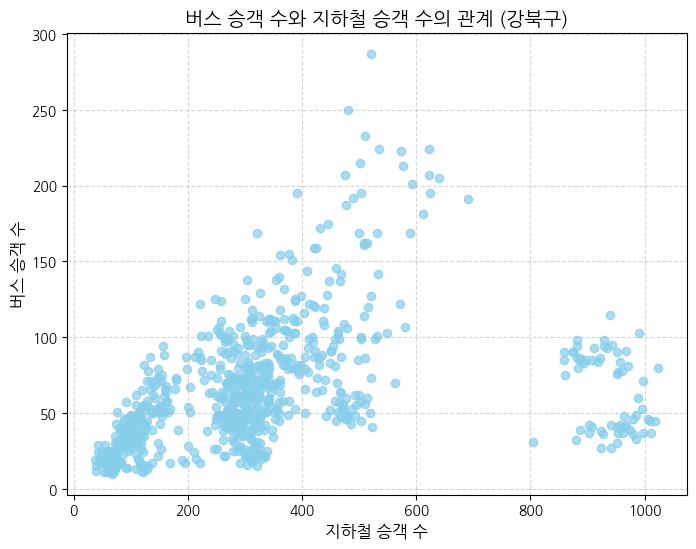

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(ui['지하철_승객_수'], ui['버스_승객_수'], color='skyblue', alpha=0.7)
plt.title('버스 승객 수와 지하철 승객 수의 관계 (강북구)', fontsize=14)
plt.xlabel('지하철 승객 수', fontsize=12)
plt.ylabel('버스 승객 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [15]:
# 강남구 행정동 기준 분석
apgujung = df.loc[(df['행정동_ID'] == 11230770) & (df['기준_날짜'] >= '2024-11-01'), '시간':'버스_승객_수'].reset_index(drop=True)
apgujung

,시간,지하철_승객_수,버스_승객_수
0,6,256.0,306.0
1,6,364.0,399.0
2,6,371.0,404.0
3,6,398.0,399.0
4,6,388.0,388.0
...,...,...,...
743,22,1773.0,1104.0
744,22,1698.0,1006.0
745,22,896.0,724.0
746,22,1715.0,1239.0


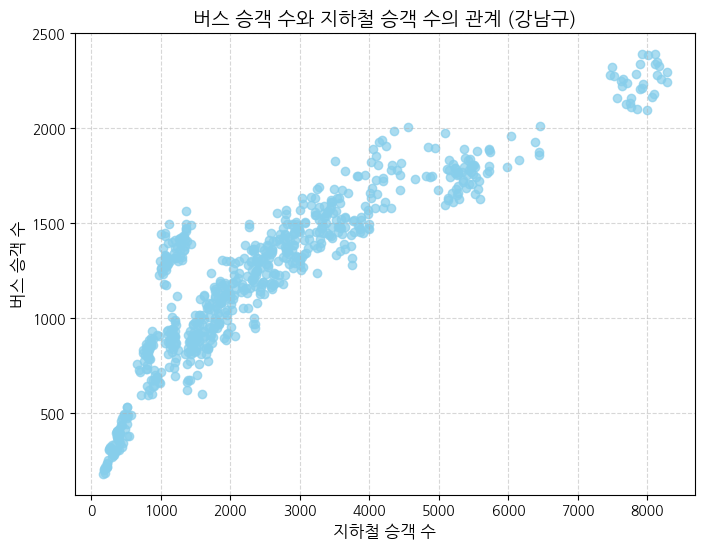

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(apgujung['지하철_승객_수'], apgujung['버스_승객_수'], color='skyblue', alpha=0.7)
plt.title('버스 승객 수와 지하철 승객 수의 관계 (강남구)', fontsize=14)
plt.xlabel('지하철 승객 수', fontsize=12)
plt.ylabel('버스 승객 수', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()